<a href="https://colab.research.google.com/github/rexian/ML/blob/main/text2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install diffusers transformers accelerate

Text to Image generation using Stable Diffusion and Diffusers

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

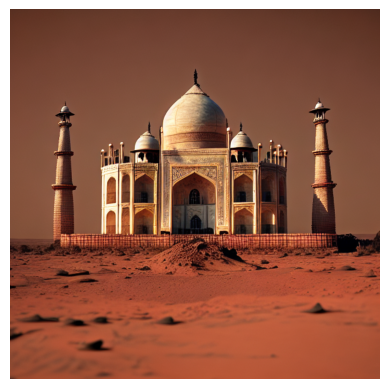

  0%|          | 0/50 [00:00<?, ?it/s]

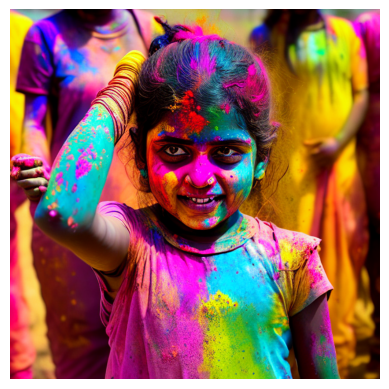

In [32]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-2-1"
model_id = model_id2

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photograph of Tajmahal on Mars"
image = pipe(prompt).images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

#image.save("astronaut_rides_horse.png")

prompt = "a photograph of a girl playing holi"
image = pipe(prompt).images[0]
plt.imshow(image)
plt.axis("off")
plt.show()


Working with Diffusion parameters

* negative prompting
* num_inference_steps
* num_images_per_prompt
* width
* height

In [20]:
def generate_image(pipe, prompt, params):
    img = pipe(prompt, **params).images

    if len(img) > 1:
      fig, ax = plt.subplots(nrows=1, ncols=len(img))
      for i in range(len(img)):
        ax[i].imshow(img[i])
        ax[i].axis("off")
        plt.show()
    else:
        fig = plt.figure()
        plt.imshow(img[0])
        plt.axis("off")
        plt.show()
    plt.tight_layout()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

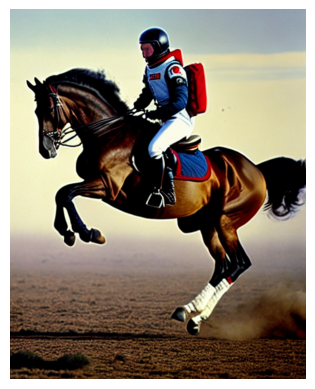

<Figure size 640x480 with 0 Axes>

In [26]:
prompt = "a photograph of an astronaut riding a horse"
params = {'num_inference_steps': 100, 'width': 512, 'height': int(640), 'negative_prompt': 'distorted, ugly'}
generate_image(pipe, prompt, params)
#

  0%|          | 0/100 [00:00<?, ?it/s]

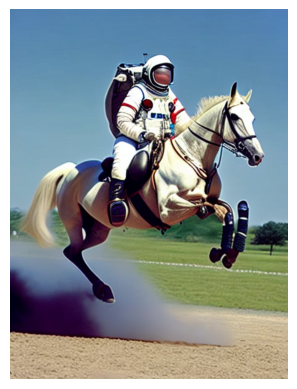

<Figure size 640x480 with 0 Axes>

In [30]:
prompt = "a photograph of an astronaut riding a horse"
params = {'num_inference_steps': 100, 'width': 480, 'height': 640, 'negative_prompt': 'distorted, dark'}
generate_image(pipe, prompt, params)